In [1]:
import statsmodels
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
Nigeria_1960=pd.read_csv('/content/Copy of 1960_onwards1.csv')

In [3]:
Nigeria_1960.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 47 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Year                                                      65 non-null     int64  
 1   Consumer price index (2010 = 100)                         65 non-null     float64
 2   GDP (constant LCU)                                        65 non-null     float64
 3   GDP (current LCU)                                         65 non-null     float64
 4   GDP growth (annual %)                                     65 non-null     float64
 5   GDP per capita (current US$)                              65 non-null     float64
 6   GDP per capita growth (annual %)                          65 non-null     float64
 7   Inflation, GDP deflator (annual %)                        65 non-null     float64
 8   Inflation, consumer pr

**Variables highly correlated to GDP per capita (current US$)**<br> <br>

Consumer price index (2010 = 100)	<br>
Livestock production index (2014-2016 = 100)<br>
Official exchange rate (LCU per USD) <br>
Total reserves (includes gold in current US$) <br>
Crude oil price(per barrel in USD)	<br>
Narrow Money<br>
Net Foreign Assets<br>
Currency in Circulation<br>
Credit to Private Sector	<br>
Food exports (% of merchandise imports)<br>






In [4]:
import plotly.express as px
px.line(Nigeria_1960, x='Year', y='GDP per capita (current US$)', title='GDP per capita (current US$)')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

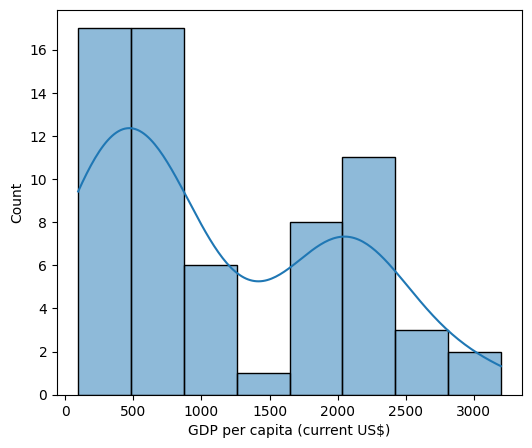

In [14]:
plt.figure(figsize=(6, 5))
sns.histplot(Nigeria_1960['GDP per capita (current US$)'],  kde=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaled_Nigeria1960 = Nigeria_1960.copy()

In [17]:
scaled_Nigeria1960= scaled_Nigeria1960.loc[:,['GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]

In [18]:
scaled_Nigeria1960=scaler.fit_transform(scaled_Nigeria1960)
scaled_Nigeria1960

array([[-1.17347269, -1.3852979 , -0.7031159 , -1.01076625, -0.81869538,
        -0.59253503, -0.63466801, -0.48547867,  2.57657369],
       [-1.16892389, -1.3852979 , -0.7031159 , -1.01268607, -0.82080992,
        -0.59253233, -0.63466144, -0.48547811,  2.57657369],
       [-1.16051652, -1.43153217, -0.7031159 , -1.01396595, -0.82187196,
        -0.5925338 , -0.6346457 , -0.48547582,  2.57657369],
       [-1.15692953, -1.42403472, -0.7031159 , -1.01492586, -0.826521  ,
        -0.59253842, -0.6346363 , -0.48547425,  2.46333442],
       [-1.15054763, -1.37248976, -0.7031159 , -1.01652571, -0.82546031,
        -0.59254015, -0.63460213, -0.48547046,  2.39621069],
       [-1.14601014, -1.34312475, -0.7031159 , -1.01748562, -0.82481292,
        -0.59253415, -0.63459867, -0.48546977,  2.05700528],
       [-1.13795356, -1.35780725, -0.7031159 , -1.01940544, -0.82620774,
        -0.59253983, -0.63457842, -0.48546883,  1.67219673],
       [-1.16616292, -1.29501611, -0.7031159 , -1.02036535, -0

In [19]:
scaled_Nigeria1960_df=pd.DataFrame(scaled_Nigeria1960)
scaled_Nigeria1960_df

,0,1,2,3,4,5,6,7,8
0,-1.173473,-1.385298,-0.703116,-1.010766,-0.818695,-0.592535,-0.634668,-0.485479,2.576574
1,-1.168924,-1.385298,-0.703116,-1.012686,-0.820810,-0.592532,-0.634661,-0.485478,2.576574
2,-1.160517,-1.431532,-0.703116,-1.013966,-0.821872,-0.592534,-0.634646,-0.485476,2.576574
3,-1.156930,-1.424035,-0.703116,-1.014926,-0.826521,-0.592538,-0.634636,-0.485474,2.463334
4,-1.150548,-1.372490,-0.703116,-1.016526,-0.825460,-0.592540,-0.634602,-0.485470,2.396211
...,...,...,...,...,...,...,...,...,...
60,1.068351,1.560262,2.179504,0.263995,1.322758,0.952938,1.989986,1.612081,-0.576704
61,1.058349,1.562137,2.520331,1.173351,1.543268,0.931988,2.503079,1.887782,-0.561333
62,1.167950,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489
63,1.167950,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731


In [20]:
scaled_Nigeria1960_df=scaled_Nigeria1960_df.set_axis(['GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)'],axis=1)

In [21]:
scaled_Nigeria1960_df['Year']=Nigeria_1960['Year']
scaled_Nigeria1960_df['Civil War']=Nigeria_1960['Civil War']
scaled_Nigeria1960_df['Recession']=Nigeria_1960['Recession']
scaled_Nigeria1960_df['Regime Type']=Nigeria_1960['Regime Type']
scaled_Nigeria1960_df

,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports),Year,Civil War,Recession,Regime Type
0,-1.173473,-1.385298,-0.703116,-1.010766,-0.818695,-0.592535,-0.634668,-0.485479,2.576574,1960,No,No,Monarchy
1,-1.168924,-1.385298,-0.703116,-1.012686,-0.820810,-0.592532,-0.634661,-0.485478,2.576574,1961,No,No,Monarchy
2,-1.160517,-1.431532,-0.703116,-1.013966,-0.821872,-0.592534,-0.634646,-0.485476,2.576574,1962,No,No,Monarchy
3,-1.156930,-1.424035,-0.703116,-1.014926,-0.826521,-0.592538,-0.634636,-0.485474,2.463334,1963,No,No,Presidency
4,-1.150548,-1.372490,-0.703116,-1.016526,-0.825460,-0.592540,-0.634602,-0.485470,2.396211,1964,No,No,Presidency
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1.068351,1.560262,2.179504,0.263995,1.322758,0.952938,1.989986,1.612081,-0.576704,2020,No,Yes,Presidency
61,1.058349,1.562137,2.520331,1.173351,1.543268,0.931988,2.503079,1.887782,-0.561333,2021,No,No,Presidency
62,1.167950,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489,2022,No,No,Presidency
63,1.167950,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731,2023,No,No,Presidency


In [22]:
scaled_Nigeria1960_df=scaled_Nigeria1960_df[['Year','Civil War','Recession','Regime Type','GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]

In [23]:
scaled_Nigeria1960_df

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,No,No,Monarchy,-1.173473,-1.385298,-0.703116,-1.010766,-0.818695,-0.592535,-0.634668,-0.485479,2.576574
1,1961,No,No,Monarchy,-1.168924,-1.385298,-0.703116,-1.012686,-0.820810,-0.592532,-0.634661,-0.485478,2.576574
2,1962,No,No,Monarchy,-1.160517,-1.431532,-0.703116,-1.013966,-0.821872,-0.592534,-0.634646,-0.485476,2.576574
3,1963,No,No,Presidency,-1.156930,-1.424035,-0.703116,-1.014926,-0.826521,-0.592538,-0.634636,-0.485474,2.463334
4,1964,No,No,Presidency,-1.150548,-1.372490,-0.703116,-1.016526,-0.825460,-0.592540,-0.634602,-0.485470,2.396211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,No,Yes,Presidency,1.068351,1.560262,2.179504,0.263995,1.322758,0.952938,1.989986,1.612081,-0.576704
61,2021,No,No,Presidency,1.058349,1.562137,2.520331,1.173351,1.543268,0.931988,2.503079,1.887782,-0.561333
62,2022,No,No,Presidency,1.167950,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489
63,2023,No,No,Presidency,1.167950,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731


In [24]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [25]:
scaled_Nigeria1960_df['Regime Type']=LE.fit_transform(scaled_Nigeria1960_df['Regime Type'])

In [26]:
scaled_Nigeria1960_df['Civil War']=LE.fit_transform(scaled_Nigeria1960_df['Civil War'])
scaled_Nigeria1960_df['Recession']=LE.fit_transform(scaled_Nigeria1960_df['Recession'])

In [27]:
scaled_Nigeria1960_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  65 non-null     int64  
 1   Civil War                                             65 non-null     int64  
 2   Recession                                             65 non-null     int64  
 3   Regime Type                                           65 non-null     int64  
 4   GDP per capita (current US$)                          65 non-null     float64
 5   Livestock production index (2014-2016 = 100)          65 non-null     float64
 6   Official exchange rate (LCU per US$, period average)  65 non-null     float64
 7   Crude oil price(per barrel in $)                      65 non-null     float64
 8   Total reserves (includes gold, current US$)           65 non-n

In [28]:
scaled_Nigeria1960_df

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,0,0,1,-1.173473,-1.385298,-0.703116,-1.010766,-0.818695,-0.592535,-0.634668,-0.485479,2.576574
1,1961,0,0,1,-1.168924,-1.385298,-0.703116,-1.012686,-0.820810,-0.592532,-0.634661,-0.485478,2.576574
2,1962,0,0,1,-1.160517,-1.431532,-0.703116,-1.013966,-0.821872,-0.592534,-0.634646,-0.485476,2.576574
3,1963,0,0,2,-1.156930,-1.424035,-0.703116,-1.014926,-0.826521,-0.592538,-0.634636,-0.485474,2.463334
4,1964,0,0,2,-1.150548,-1.372490,-0.703116,-1.016526,-0.825460,-0.592540,-0.634602,-0.485470,2.396211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,0,1,2,1.068351,1.560262,2.179504,0.263995,1.322758,0.952938,1.989986,1.612081,-0.576704
61,2021,0,0,2,1.058349,1.562137,2.520331,1.173351,1.543268,0.931988,2.503079,1.887782,-0.561333
62,2022,0,0,2,1.167950,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489
63,2023,0,0,2,1.167950,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731


In [46]:
# Set outcome and predictors
train_set = scaled_Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] < 2022]
#test_set = scaled_Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] >= 2022]
test_set= Nigeria_1960.loc[:,['Year','GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]
test_set = test_set.loc[test_set['Year'] >= 2022]

In [43]:
train_set

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,0,0,1,-1.173473,-1.385298,-0.703116,-1.010766,-0.818695,-0.592535,-0.634668,-0.485479,2.576574
1,1961,0,0,1,-1.168924,-1.385298,-0.703116,-1.012686,-0.820810,-0.592532,-0.634661,-0.485478,2.576574
2,1962,0,0,1,-1.160517,-1.431532,-0.703116,-1.013966,-0.821872,-0.592534,-0.634646,-0.485476,2.576574
3,1963,0,0,2,-1.156930,-1.424035,-0.703116,-1.014926,-0.826521,-0.592538,-0.634636,-0.485474,2.463334
4,1964,0,0,2,-1.150548,-1.372490,-0.703116,-1.016526,-0.825460,-0.592540,-0.634602,-0.485470,2.396211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,0,0,2,0.918162,1.222565,1.752706,0.617242,1.544613,1.411539,1.447242,1.110777,-0.635630
58,2018,0,0,2,1.126309,1.325655,1.755040,1.169831,1.682308,2.951381,1.520487,1.141840,-0.627944
59,2019,0,0,2,1.361885,1.465295,1.761802,0.986168,1.417295,2.580347,1.681124,1.315999,-0.637167
60,2020,0,1,2,1.068351,1.560262,2.179504,0.263995,1.322758,0.952938,1.989986,1.612081,-0.576704


In [38]:
#Splitting outcome Y and predictors X from train set to build linear regresiion model
X = train_set.drop(['GDP per capita (current US$)'], axis=1)
y = train_set['GDP per capita (current US$)']

In [39]:
Linear_model=LinearRegression().fit(X,y)

In [40]:
print("Model Score: \n", Linear_model.score(X, y))
print("\nModel coefficients: \n", Linear_model.coef_)
print("\nModel intercept", Linear_model.intercept_)

print("\nModel MSE:", mean_squared_error(y, Linear_model.predict(X)))



Model Score: 
 0.9215614302665681

Model coefficients: 
 [ 0.01186815  0.20814702  0.32365658  0.25324323  0.63918667 -2.27439509
 -0.00410739  0.03252121  0.17912339  1.6019202   0.45322813 -0.12018774]

Model intercept -23.914251334642724

Model MSE: 0.07680611588779226


In [52]:
test_set['Civil War']=Nigeria_1960['Civil War']
test_set['Recession']=Nigeria_1960['Recession']
test_set['Regime Type']=Nigeria_1960['Regime Type']
test_set=test_set[['Year','Civil War','Recession','Regime Type','GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]

In [54]:
test_set['Civil War']=LE.fit_transform(test_set['Regime Type'])
test_set['Recession']=LE.fit_transform(test_set['Recession'])
test_set['Civil War']=LE.fit_transform(test_set['Civil War'])
test_set['Pres']=LE.fit_transform(test_set['Civil War'])


prediction=Linear_model.predict(test_set.drop(['GDP per capita (current US$)'], axis=1))
prediction

KeyError: "['Presidency'] not found in axis"

In [ ]:
pd.DataFrame(prediction)

,0
0,1.337959
1,0.515934
2,4.134874


In [ ]:
Predictions_2022=test_set.copy()
Predictions_2022['Predictions']=prediction
Predictions_2022

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports),Predictions
62,2022,0,0,2,1.16795,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489,1.337959
63,2023,0,0,2,1.16795,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731,0.515934
64,2024,0,0,2,1.16795,1.604935,2.720207,1.555395,1.254158,4.539406,3.481465,4.960217,-0.081731,4.134874


In [ ]:
Predictions_2022=Predictions_2022[['Year','GDP per capita (current US$)','Predictions','Civil War',	'Recession',	'Regime Type','Livestock production index (2014-2016 = 100)','Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)',	'Total reserves (includes gold, current US$)',	'Net Foreign Assets',	'Currency in Circulation',	'Credit to Private Sector',	'Food exports (% of merchandise imports)']]
Predictions_2022

,Year,GDP per capita (current US$),Predictions,Civil War,Recession,Regime Type,Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
62,2022,1.16795,1.337959,0,0,2,1.604935,2.720207,2.139341,1.254158,0.682667,2.889427,2.329188,-0.588489
63,2023,1.16795,0.515934,0,0,2,1.604935,2.720207,1.591232,1.254158,1.464916,2.047439,3.285524,-0.081731
64,2024,1.16795,4.134874,0,0,2,1.604935,2.720207,1.555395,1.254158,4.539406,3.481465,4.960217,-0.081731


In [ ]:
Predictions_2022.drop(['Year','Civil War','Recession','Regime Type'],axis=1,inplace=True)

<ipython-input-99-fbdac526d7b5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Predictions_2022.drop(['Predictions'],axis=1, inplace=True)

<ipython-input-112-58aff4aa8090>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Unscaled_Predictions_2022=Predictions_2022.to_numpy()
Unscaled_Predictions_2022

array([[ 1.16794989,  1.60493471,  2.72020712,  2.13934061,  1.25415848,
         0.68266688,  2.88942666,  2.32918764, -0.58848946],
       [ 1.16794989,  1.60493471,  2.72020712,  1.59123161,  1.25415848,
         1.46491604,  2.04743942,  3.28552401, -0.08173092],
       [ 1.16794989,  1.60493471,  2.72020712,  1.55539495,  1.25415848,
         4.53940601,  3.48146472,  4.96021673, -0.08173092]])

# **Below are predictions without Scaling of the data:**

In [ ]:
Nigeria_1960

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),...,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports),Regime Type,Civil War,Recession
0,1960,0.07,9.280000e+12,2.997269e+09,0.19,93.40,-1.83,6.26,5.44,17.19,...,258214.99,4.20,93.40,0.00,0.05,14.13,64.52,Monarchy,No,No
1,1961,0.07,9.300000e+12,3.190921e+09,0.19,97.42,-1.83,6.26,6.28,17.19,...,258214.99,4.47,97.42,0.19,0.05,14.13,64.52,Monarchy,No,No
2,1962,0.07,9.680000e+12,3.506715e+09,4.10,104.85,1.95,5.57,5.27,15.71,...,258214.99,4.91,104.85,4.10,0.05,14.13,64.52,Monarchy,No,No
3,1963,0.07,1.050000e+13,3.689709e+09,8.58,108.02,6.31,-3.09,-2.69,15.95,...,258214.99,5.17,108.02,8.58,0.05,12.14,62.31,Presidency,No,No
4,1964,0.07,1.100000e+13,3.966381e+09,4.95,113.66,2.73,2.43,0.86,17.60,...,258214.99,5.55,113.66,4.95,0.05,9.24,61.00,Presidency,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,302.94,7.080000e+13,1.542520e+14,-1.79,2074.61,-4.16,7.85,13.25,111.48,...,317234.17,432.20,2074.61,-1.79,165.00,14.63,2.98,Presidency,No,Yes
61,2021,354.30,7.340000e+13,1.760760e+14,3.65,2065.77,1.18,10.13,16.95,111.54,...,340377.25,440.84,2065.77,3.65,168.00,14.16,3.28,Presidency,No,No
62,2022,421.07,7.580000e+13,2.023650e+14,3.25,2162.63,0.82,11.31,18.85,112.91,...,375808.20,472.62,2162.63,3.25,195.00,11.43,2.75,Presidency,No,No
63,2023,421.07,7.580000e+13,2.023650e+14,3.25,2162.63,0.82,11.31,18.85,112.91,...,340630.66,472.62,2162.63,3.25,626.00,14.72,12.64,Presidency,No,No


In [ ]:
Nigeria1960_df=Nigeria_1960[['Year','Civil War','Recession','Regime Type','GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]

In [ ]:
Nigeria1960_df['Regime Type']=LE.fit_transform(scaled_Nigeria1960_df['Regime Type'])
Nigeria1960_df['Civil War']=LE.fit_transform(scaled_Nigeria1960_df['Civil War'])
Nigeria1960_df['Recession']=LE.fit_transform(scaled_Nigeria1960_df['Recession'])

<ipython-input-118-1324f905757f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-1324f905757f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-1324f905757f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Nigeria1960_df

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,0,0,1,93.40,17.19,0.71,1.63,3.430000e+08,150.28,154.15,109.33,64.52
1,1961,0,0,1,97.42,17.19,0.71,1.57,3.070706e+08,163.63,160.19,117.13,64.52
2,1962,0,0,1,104.85,15.71,0.71,1.53,2.890250e+08,156.34,174.66,148.78,64.52
3,1963,0,0,2,108.02,15.95,0.71,1.50,2.100307e+08,133.45,183.30,170.50,62.31
4,1964,0,0,2,113.66,17.60,0.71,1.45,2.280535e+08,124.89,214.71,222.96,61.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,0,1,2,2074.61,111.48,358.81,41.47,3.672957e+10,7653825.38,2412980.96,29030014.55,2.98
61,2021,0,0,2,2065.77,111.54,401.15,69.89,4.047636e+10,7550076.29,2884664.24,32845669.38,3.28
62,2022,0,0,2,2162.63,112.91,425.98,100.08,3.556395e+10,6315357.56,3239831.20,38954662.59,2.75
63,2023,0,0,2,2162.63,112.91,425.98,82.95,3.556395e+10,10189305.37,2465797.87,52190212.27,12.64


In [ ]:
# Set outcome and predictors
train_set = Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] < 2023]
test_set = Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] >= 2023]

In [ ]:
#Splitting outcome Y and predictors X from train set to build linear regresiion model
X = train_set.drop(['GDP per capita (current US$)'], axis=1)
y = train_set['GDP per capita (current US$)']

In [ ]:
Ridge_model= Ridge().fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.41791e-22): result may not be accurate.



In [ ]:
Ridge_model

Ridge()

In [ ]:
print(Ridge_model.score(X, y))
print(Ridge_model.coef_)
print(Ridge_model.intercept_)
#reg.predict(np.array([[3, 5]]))


0.9227244580483838
[ 1.03587723e+01  1.21264216e+02  2.39091583e+02  2.15941204e+02
  1.79077622e+01 -1.63296820e+01 -8.02477141e-01  2.45437247e-09
  3.52625047e-05  1.56604245e-03  2.69531859e-05 -5.27926634e+00]
-20530.233668859837


In [ ]:
predictions=Linear_model.predict(test_set.drop(['GDP per capita (current US$)'], axis=1))
predictions

array([1420.58011279, 4687.2115902 ])

In [ ]:
Nigeria1960_df

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,0,0,1,93.40,17.19,0.71,1.63,3.430000e+08,150.28,154.15,109.33,64.52
1,1961,0,0,1,97.42,17.19,0.71,1.57,3.070706e+08,163.63,160.19,117.13,64.52
2,1962,0,0,1,104.85,15.71,0.71,1.53,2.890250e+08,156.34,174.66,148.78,64.52
3,1963,0,0,2,108.02,15.95,0.71,1.50,2.100307e+08,133.45,183.30,170.50,62.31
4,1964,0,0,2,113.66,17.60,0.71,1.45,2.280535e+08,124.89,214.71,222.96,61.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,0,1,2,2074.61,111.48,358.81,41.47,3.672957e+10,7653825.38,2412980.96,29030014.55,2.98
61,2021,0,0,2,2065.77,111.54,401.15,69.89,4.047636e+10,7550076.29,2884664.24,32845669.38,3.28
62,2022,0,0,2,2162.63,112.91,425.98,100.08,3.556395e+10,6315357.56,3239831.20,38954662.59,2.75
63,2023,0,0,2,2162.63,112.91,425.98,82.95,3.556395e+10,10189305.37,2465797.87,52190212.27,12.64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_Nigeria1960_df=Nigeria1960_df.copy()
scaled_Nigeria1960_df= scaled_Nigeria1960_df.loc[:,['GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)']]
scaled_Nigeria1960_df=scaler.fit_transform(scaled_Nigeria1960_df)


In [ ]:
scaled_Nigeria1960_df=pd.DataFrame(scaled_Nigeria1960_df)
scaled_Nigeria1960_df

,0,1,2,3,4,5,6,7,8
0,0.000000,0.015226,0.000376,0.003880,0.004312,0.000004,0.000000,0.000000e+00,1.000000
1,0.001294,0.015226,0.000376,0.003326,0.003640,0.000005,0.000002,1.034928e-07,1.000000
2,0.003685,0.000000,0.000376,0.002956,0.003303,0.000004,0.000005,5.234345e-07,1.000000
3,0.004705,0.002469,0.000376,0.002679,0.001826,0.000003,0.000008,8.116220e-07,0.965736
4,0.006520,0.019444,0.000376,0.002217,0.002163,0.000003,0.000016,1.507677e-06,0.945426
...,...,...,...,...,...,...,...,...,...
60,0.637547,0.985288,0.842113,0.371951,0.684616,0.301151,0.637650,3.851775e-01,0.045891
61,0.634703,0.985905,0.941636,0.634516,0.754669,0.297068,0.762305,4.358048e-01,0.050543
62,0.665872,1.000000,1.000000,0.913433,0.662823,0.248486,0.856166,5.168608e-01,0.042326
63,0.665872,1.000000,1.000000,0.755174,0.662823,0.400913,0.651609,6.924740e-01,0.195659


In [ ]:
scaled_Nigeria1960_df=scaled_Nigeria1960_df.set_axis(['GDP per capita (current US$)','Livestock production index (2014-2016 = 100)', 'Official exchange rate (LCU per US$, period average)','Crude oil price(per barrel in $)','Total reserves (includes gold, current US$)','Net Foreign Assets','Currency in Circulation','Credit to Private Sector', 'Food exports (% of merchandise imports)'],axis=1)

In [ ]:
scaled_Nigeria1960_df['Year']=Nigeria_1960['Year']
scaled_Nigeria1960_df['Civil War']=Nigeria_1960['Civil War']
scaled_Nigeria1960_df['Recession']=Nigeria_1960['Recession']
scaled_Nigeria1960_df['Regime Type']=Nigeria_1960['Regime Type']
scaled_Nigeria1960_df

,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports),Year,Civil War,Recession,Regime Type
0,0.000000,0.015226,0.000376,0.003880,0.004312,0.000004,0.000000,0.000000e+00,1.000000,1960,No,No,Monarchy
1,0.001294,0.015226,0.000376,0.003326,0.003640,0.000005,0.000002,1.034928e-07,1.000000,1961,No,No,Monarchy
2,0.003685,0.000000,0.000376,0.002956,0.003303,0.000004,0.000005,5.234345e-07,1.000000,1962,No,No,Monarchy
3,0.004705,0.002469,0.000376,0.002679,0.001826,0.000003,0.000008,8.116220e-07,0.965736,1963,No,No,Presidency
4,0.006520,0.019444,0.000376,0.002217,0.002163,0.000003,0.000016,1.507677e-06,0.945426,1964,No,No,Presidency
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.637547,0.985288,0.842113,0.371951,0.684616,0.301151,0.637650,3.851775e-01,0.045891,2020,No,Yes,Presidency
61,0.634703,0.985905,0.941636,0.634516,0.754669,0.297068,0.762305,4.358048e-01,0.050543,2021,No,No,Presidency
62,0.665872,1.000000,1.000000,0.913433,0.662823,0.248486,0.856166,5.168608e-01,0.042326,2022,No,No,Presidency
63,0.665872,1.000000,1.000000,0.755174,0.662823,0.400913,0.651609,6.924740e-01,0.195659,2023,No,No,Presidency


In [ ]:
scaled_Nigeria1960_df['Regime Type']=LE.fit_transform(scaled_Nigeria1960_df['Regime Type'])
scaled_Nigeria1960_df['Civil War']=LE.fit_transform(scaled_Nigeria1960_df['Civil War'])
scaled_Nigeria1960_df['Recession']=LE.fit_transform(scaled_Nigeria1960_df['Recession'])

In [ ]:
# Set outcome and predictors
train_set = scaled_Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] < 2000]
test_set = scaled_Nigeria1960_df.loc[scaled_Nigeria1960_df['Year'] >= 2000]

#Splitting outcome Y and predictors X from train set to build linear regresiion model
X = train_set.drop(['GDP per capita (current US$)'], axis=1)
y = train_set['GDP per capita (current US$)']

In [ ]:
Linear_model=LinearRegression().fit(X,y)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
Ridge_model= Ridge().fit(X,y)

In [ ]:
Ridge_model.score(X, y)

0.60340784312561

In [ ]:
Ridge_model.coef_

array([ 0.04743582, -0.055938  ,  0.09549972,  0.03054068, -0.00362702,
        0.00385288,  0.00035152, -0.08697808,  0.00858009,  0.02447164,
        0.09138858,  0.06237017])

In [ ]:
Predictions_2023=test_set.copy()
Predictions_2023=Ridge_model.predict(Nigeria1960_df.drop(['GDP per capita (current US$)'], axis=1))
Predictions_2023

array([ -55.69325733,  -45.36438055,  -61.49803137,  180.61048862,
        227.56756749,  289.76573951,  331.37365121,   44.41594862,
        -14.1295719 ,  168.08940759,  126.72036893,  192.89171367,
        209.11593287,  296.76155943,  384.92005503,  638.58921823,
        512.34026094,  484.53976563,  757.21144452,  597.06610265,
       1142.92121795, 1391.38022667, 1163.16660991, 1296.13280632,
        910.65528873, 1035.81707036,  901.85688526,  903.78573445,
        831.48966656,  783.28128791,  807.52181648,  800.94894775,
        718.15009593,  751.02336887,  880.65975275,  970.31562999,
       1097.70207903, 1191.34572416, 1348.32788238,  748.56304677,
        696.56330754,  874.01427431,  866.60619493,  806.3353454 ,
        830.39678722, 1040.50262762, 1401.17465584, 1890.44395866,
       2468.64709676, 2238.82572122, 2298.44054966, 2617.0294493 ,
       2695.13123537, 3044.22310978, 3132.57920538, 2756.17494277,
       2280.3309575 , 1595.11280502, 2036.86310462, 2339.49018

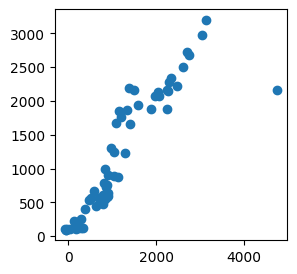

In [ ]:
plt.figure(figsize=(3, 3))
plt.scatter(Predictions_2023,Nigeria1960_df['GDP per capita (current US$)'])
plt.show()

In [ ]:
Nigeria1960_df

,Year,Civil War,Recession,Regime Type,GDP per capita (current US$),Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",Crude oil price(per barrel in $),"Total reserves (includes gold, current US$)",Net Foreign Assets,Currency in Circulation,Credit to Private Sector,Food exports (% of merchandise imports)
0,1960,0,0,1,93.40,17.19,0.71,1.63,3.430000e+08,150.28,154.15,109.33,64.52
1,1961,0,0,1,97.42,17.19,0.71,1.57,3.070706e+08,163.63,160.19,117.13,64.52
2,1962,0,0,1,104.85,15.71,0.71,1.53,2.890250e+08,156.34,174.66,148.78,64.52
3,1963,0,0,2,108.02,15.95,0.71,1.50,2.100307e+08,133.45,183.30,170.50,62.31
4,1964,0,0,2,113.66,17.60,0.71,1.45,2.280535e+08,124.89,214.71,222.96,61.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,0,1,2,2074.61,111.48,358.81,41.47,3.672957e+10,7653825.38,2412980.96,29030014.55,2.98
61,2021,0,0,2,2065.77,111.54,401.15,69.89,4.047636e+10,7550076.29,2884664.24,32845669.38,3.28
62,2022,0,0,2,2162.63,112.91,425.98,100.08,3.556395e+10,6315357.56,3239831.20,38954662.59,2.75
63,2023,0,0,2,2162.63,112.91,425.98,82.95,3.556395e+10,10189305.37,2465797.87,52190212.27,12.64
